# K-Means (clustering)

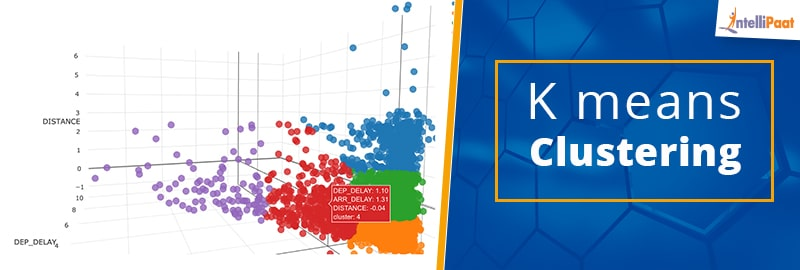

In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
# Load data
df = pd.read_csv('mall_customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# examine the shape
df.shape

(200, 5)

In [4]:
# Check missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# create an instance encoder for encodinh 'Gender' feature
ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

# Create a transformer
ct = make_column_transformer((ohe, ['Gender']), 
                             remainder='passthrough')

In [6]:
# Select features
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print(f'We use {len(features)} features')

We use 4 features


In [7]:
# create a matrix of features
X = df[features]

In [8]:
# View transformed features
ct.fit_transform(X)

array([[  1.,  19.,  15.,  39.],
       [  1.,  21.,  15.,  81.],
       [  0.,  20.,  16.,   6.],
       [  0.,  23.,  16.,  77.],
       [  0.,  31.,  17.,  40.],
       [  0.,  22.,  17.,  76.],
       [  0.,  35.,  18.,   6.],
       [  0.,  23.,  18.,  94.],
       [  1.,  64.,  19.,   3.],
       [  0.,  30.,  19.,  72.],
       [  1.,  67.,  19.,  14.],
       [  0.,  35.,  19.,  99.],
       [  0.,  58.,  20.,  15.],
       [  0.,  24.,  20.,  77.],
       [  1.,  37.,  20.,  13.],
       [  1.,  22.,  20.,  79.],
       [  0.,  35.,  21.,  35.],
       [  1.,  20.,  21.,  66.],
       [  1.,  52.,  23.,  29.],
       [  0.,  35.,  23.,  98.],
       [  1.,  35.,  24.,  35.],
       [  1.,  25.,  24.,  73.],
       [  0.,  46.,  25.,   5.],
       [  1.,  31.,  25.,  73.],
       [  0.,  54.,  28.,  14.],
       [  1.,  29.,  28.,  82.],
       [  0.,  45.,  28.,  32.],
       [  1.,  35.,  28.,  61.],
       [  0.,  40.,  29.,  31.],
       [  0.,  23.,  29.,  87.],
       [  

#### Select K by using elbow method

In [9]:
cluster_range = range(1, 15)

errors = []
for num_cluster in cluster_range:
    kmeans = KMeans(n_clusters=num_cluster)
    pipe = make_pipeline(ct, kmeans)
    pipe.fit(X)
    errors.append(kmeans.inertia_)
    
errors

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[308862.06,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51167.19736842106,
 44389.80767355768,
 40636.495806519066,
 37221.394471824475,
 34443.389667862095,
 32664.978348136538,
 29486.23132161956,
 28622.75212405999]

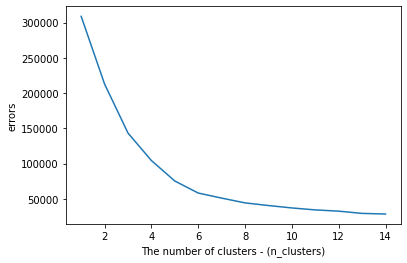

In [10]:
# Visualize errors
import matplotlib.pyplot as plt
plt.plot(range(1, 15), errors)
plt.xlabel('The number of clusters - (n_clusters)')
plt.ylabel('errors')
plt.show()

* Choose **n_clusters = 6** (elbow point)

#### Update pipeline with KMeans(n_clusters=6)

In [11]:
kmeans = KMeans(n_clusters=6)
pipe = make_pipeline(ct, kmeans)
pipe.fit(X)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['Gender'])])),
                ('kmeans', KMeans(n_clusters=6))])

#### View centroids and labels

In [12]:
# view 6 centroids
kmeans.cluster_centers_

array([[ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [13]:
# view labels with each centroid respectively
kmeans.labels_

array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 4, 5, 4, 2,
       0, 5, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [14]:
# add labels in DataFrame
df['group'] = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,5
2,3,Female,20,16,6,0
3,4,Female,23,16,77,5
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


#### Customize a simply automatic filter by defining a function that returns a group of customers having the same similarity

In [15]:
def type_customer_info():
    
    # Ask for information
    gender = input('Gender: ')
    age = input('Age: ')
    income = input('Annual Income: ')
    spending = input('Spending: ')
    
    # Make the prediction based on given infor
    X_test = pd.DataFrame([[gender, age, income, spending]], columns= features)
    
    # Filter according to predicted group
    y_pred = pipe.predict(X_test)
    
    # Return results
    return df[df['group'] == y_pred[0]]

In [16]:
type_customer_info()

Gender: Female
Age: 24
Annual Income: 500
Spending: 250


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
123,124,Male,39,69,91,3
125,126,Female,31,70,77,3
127,128,Male,40,71,95,3
129,130,Male,38,71,75,3
131,132,Male,39,71,75,3
133,134,Female,31,72,71,3
135,136,Female,29,73,88,3
137,138,Male,32,73,73,3
139,140,Female,35,74,72,3
141,142,Male,32,75,93,3


Thus, the customer with the following information including Gender: Female, Age: 24, Annual Income: 500, Spending score: 250 will belong to the **group 3**.